In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
alpha = 0.1
theta = 3
dat= [] #empty list

In [4]:
for oo in range(0,10):
    res = alpha*2*theta #update rule
    print("{0:.4f} {1:.4f}".format(theta,res))
    dat.append([theta,theta**2])
    theta=theta-res

3.0000 0.6000
2.4000 0.4800
1.9200 0.3840
1.5360 0.3072
1.2288 0.2458
0.9830 0.1966
0.7864 0.1573
0.6291 0.1258
0.5033 0.1007
0.4027 0.0805


In [11]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.000000,9.000000
1,2.400000,5.760000
2,1.920000,3.686400
3,1.536000,2.359296
4,1.228800,1.509949
5,0.983040,0.966368
6,0.786432,0.618475
7,0.629146,0.395824
8,0.503316,0.253327
9,0.402653,0.162130


Text(0,0.5,'J(theta)')

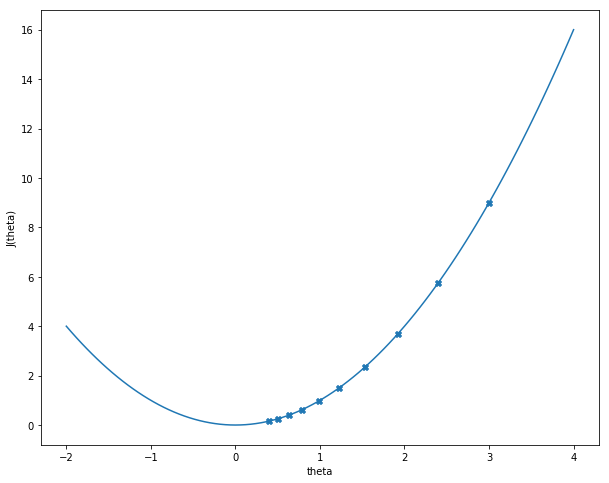

In [10]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(-2,4,100),np.linspace(-2,4,100)**2);
plt.scatter(tmp.iloc[:,0],tmp.iloc[:,1],marker='X')
plt.xlabel('theta')
plt.ylabel('J(theta)')

In [12]:
# suppose the cost function is J(0) = 0^4+0^2

In [30]:
alpha=0.01
theta=3
dat= []
for oo in range(0,10):
    res = alpha*(4*(theta**3)+2*theta)
    print("{0:.4f} {1:.4f}".format(theta,res))
    dat.append([theta, (theta**4+theta**2)])
    theta = theta - res
   

3.0000 1.1400
1.8600 0.2946
1.5654 0.1847
1.3807 0.1329
1.2478 0.1027
1.1451 0.0830
1.0621 0.0692
0.9930 0.0590
0.9339 0.0513
0.8827 0.0452


In [32]:
tmp=pd.DataFrame(dat)

In [33]:
tmp.shape

(10, 2)

Text(0,0.5,'J(theta)')

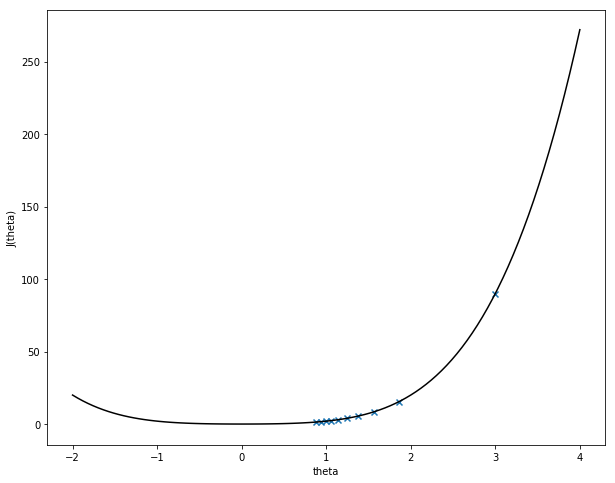

In [38]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(-2,4,100),np.linspace(-2,4,100)**4+np.linspace(-2,4,100)**2,c='black')
plt.scatter(tmp.iloc[:,0],tmp.iloc[:,1],marker="x")
plt.xlabel('theta')
plt.ylabel('J(theta)')

In [39]:
from sklearn.datasets import load_boston

In [40]:
boston_data=load_boston()

In [47]:
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [48]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [111]:
X=df[['LSTAT']].values
y=boston_data.target

In [112]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()



In [113]:
alpha=0.001
w_=np.zeros(1+X_std.shape[1]) #X_std.shape[1] give the shape for rows, since there is only one column it returns 1
cost_=[] # thus w is one dimensional and has a shape of 2, the theta0 (constant) and slope(theta1)
n_ =100

for i in range(n_):
    y_pred = np.dot(X_std,w_[1:])+ w_[0]
    errors = (y_std - y_pred)
    
    w_[1:]+= alpha* (X_std.T).dot(errors)
    w_[0]+= alpha*errors.sum()
    
    cost=(errors**2).sum()/2.0
    cost_.append(cost)
    

    

Text(0.5,0,'Epoch')

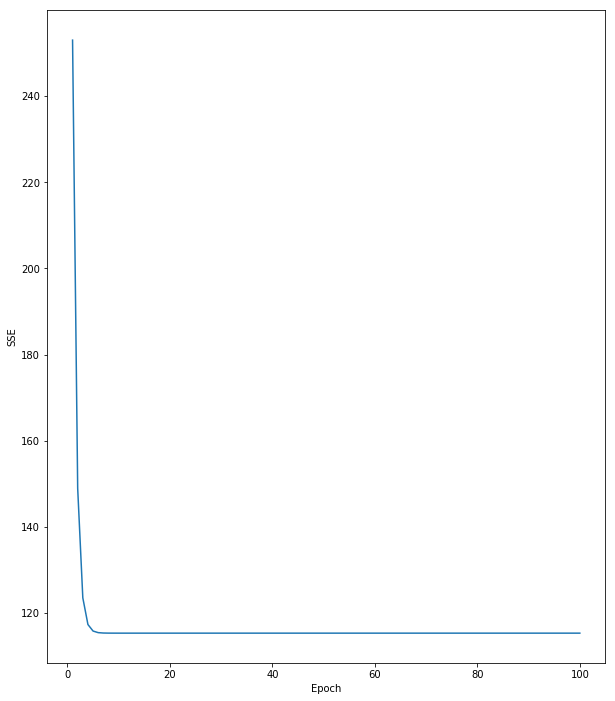

In [115]:
plt.figure(figsize=(10,12))
plt.plot(range(1,n_+1),cost_);
plt.ylabel('SSE')
plt.xlabel('Epoch')

In [116]:
w_

array([-7.70938868e-16, -7.37662726e-01])

# Regularized method for Regression

In [5]:
from sklearn.linear_model import LinearRegression

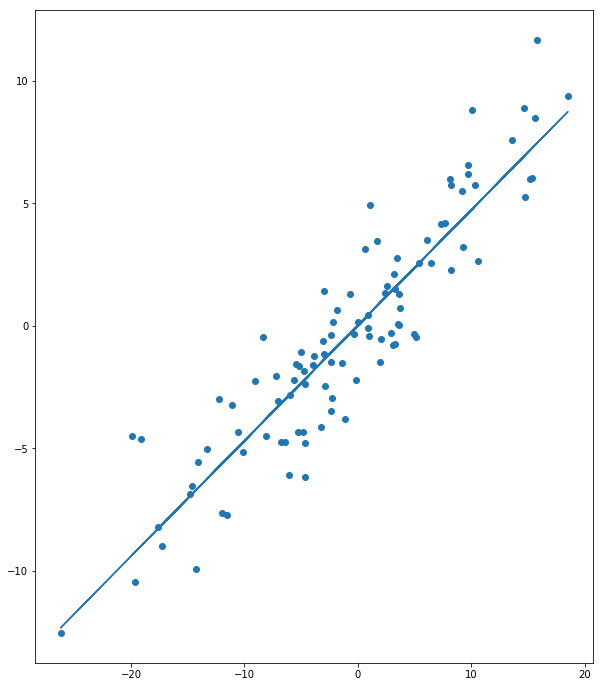

Coefficient estimate :  [0.47134857]


In [18]:
np.random.seed(42)
n_samples =100
rng = np.random.randn(n_samples)*10
y_gen = 0.5*rng + 2*np.random.randn(n_samples)

lr = LinearRegression()
lr.fit(rng.reshape(-1,1),y_gen)
model_pred = lr.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,12))
plt.scatter(rng,y_gen)
plt.plot(rng,model_pred)
plt.show()
print('Coefficient estimate : ',lr.coef_)

In [20]:
idx = rng.argmax()
y_gen[idx]=200 # making an outlier

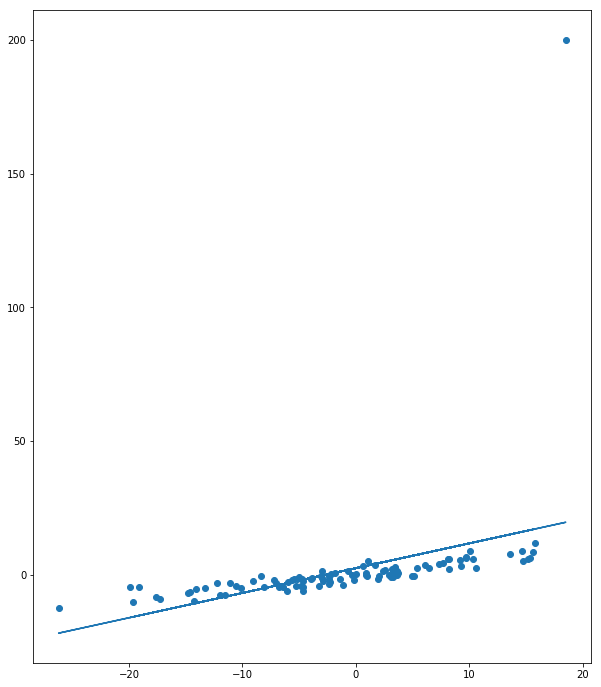

Coefficient is :  [0.92796845]


In [27]:
plt.figure(figsize=(10,12))
plt.scatter(rng.reshape(-1,1),y_gen)


o_lr = LinearRegression(normalize=True)

o_lr.fit(rng.reshape(-1,1),y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1,1))
plt.plot(rng,o_model_pred)
plt.show()
print('Coefficient is : ',o_lr.coef_)

In [28]:
#coefficient gets skewed with just one outlier


# Ridge Regression


In [30]:
from sklearn.linear_model import Ridge

Coefficient Estimate:  [0.46398423]


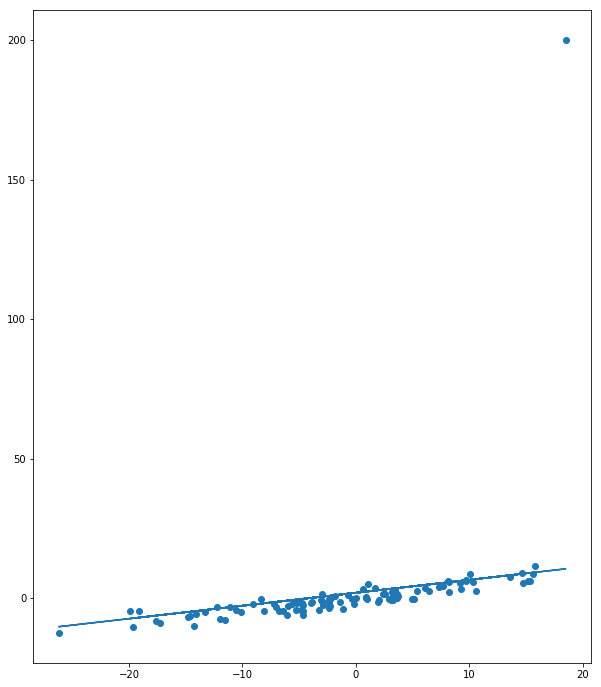

In [31]:
plt.figure(figsize=(10,12))
plt.scatter(rng,y_gen)

ridge_mod = Ridge(alpha=1,normalize=True)
ridge_mod.fit(rng.reshape(-1,1),y_gen)
ridge_mod_pred = ridge_mod.predict(rng.reshape(-1,1))

plt.plot(rng,ridge_mod_pred)
print('Coefficient Estimate: ',ridge_mod.coef_)

# lasso Regression

In [32]:
from sklearn.linear_model import Lasso

Coefficient Estimate:  [0.48530263]


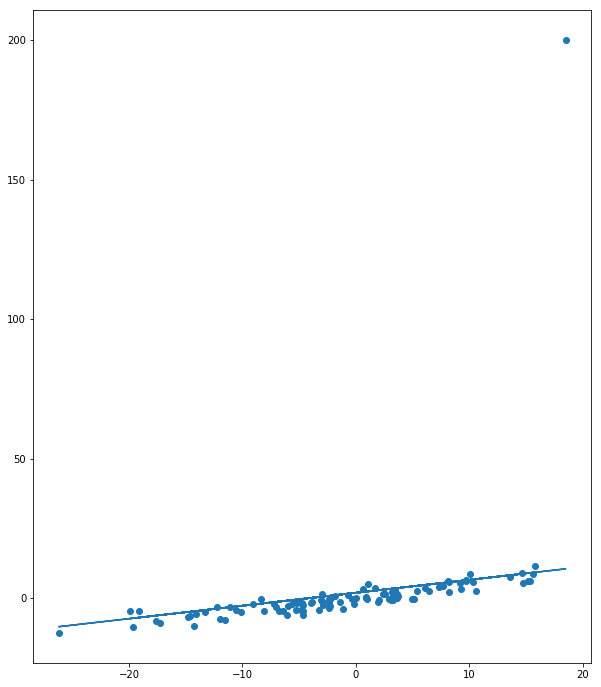

In [33]:
plt.figure(figsize=(10,12))
plt.scatter(rng,y_gen)

lasso_mod = Lasso(alpha=0.4,normalize=True)
lasso_mod.fit(rng.reshape(-1,1),y_gen)
lasso_mod_pred = ridge_mod.predict(rng.reshape(-1,1))

plt.plot(rng,lasso_mod_pred)
print('Coefficient Estimate: ',lasso_mod.coef_)

# Elastic net Regression

In [34]:
from sklearn.linear_model import ElasticNet

Coefficient Estimate:  [0.4584509]


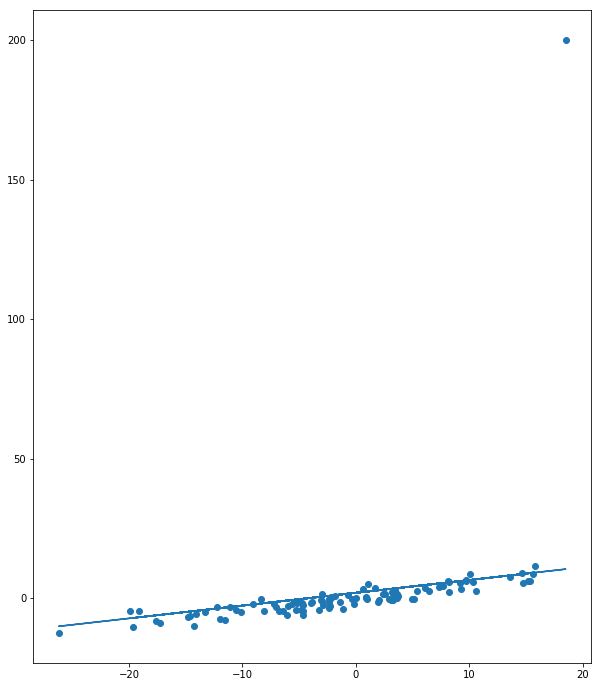

In [36]:
plt.figure(figsize=(10,12))
plt.scatter(rng,y_gen)

elasticnet_mod = ElasticNet(alpha=0.02,normalize=True)
elasticnet_mod.fit(rng.reshape(-1,1),y_gen)
elasticnet_mod_pred = elasticnet_mod.predict(rng.reshape(-1,1))

plt.plot(rng,elasticnet_mod_pred)
print('Coefficient Estimate: ',elasticnet_mod.coef_)